# Scikit-learn
SciKit-Learn es una biblioteca de aprendizaje automático de código abierto para el lenguaje de programación Python. Cuenta con varios algoritmos de clasificación, regresión y agrupación, incluidos máquinas de vectores de soporte, bosques aleatorios, aumento de gradiente, k-means y DBSCAN, y está diseñado para interoperar con las bibliotecas numéricas y científicas de Python NumPy y SciPy.

Los pasos básicos para construir y usar modelos en Scikit-learn son:
1. Analizar los datos: Se deben preparar los datos de entrada y salida para el modelo.
2. Identificar el problema: Se debe identificar el tipo de problema que se va a resolver.
3. Elegir el modelo: Se debe elegir el modelo que se va a utilizar.
4. Preparar los datos: Se deben preparar los datos de entrada y salida para el modelo.
5. Entrenar el modelo: Se debe entrenar el modelo con los datos de entrada y salida.
6. Evaluación del modelo: Se debe evaluar el modelo con los datos de entrada y salida.
7. Usar el modelo: Se debe usar el modelo para hacer predicciones.

## Aprendizaje no supervisado
El aprendizaje no supervisado es un tipo de aprendizaje en el que no se proporcionan datos de entrenamiento etiquetados. El algoritmo de aprendizaje no supervisado aprende de los datos de entrenamiento sin etiquetar y luego se puede utilizar para hacer predicciones sobre datos no etiquetados.

### Clustering
El clustering es un tipo de aprendizaje no supervisado que se utiliza para agrupar datos similares. Por ejemplo, se puede utilizar para agrupar clientes en función de sus hábitos de compra, agrupar noticias en función de su contenido, etc.

#### Analizar los datos e identificar el problema
En este ejemplo, queremos agrupar los datos de flores de iris en función de sus características. Por lo tanto, este es un problema de clustering.

In [98]:
import matplotlib.pyplot as plt
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


#### Elegir el modelo
Para resolver el problema, utilizaremos el algoritmo de clustering de k-means. El algoritmo de clustering de k-means es un algoritmo de aprendizaje no supervisado que se utiliza para agrupar datos similares. El algoritmo de clustering de k-means se puede utilizar para problemas de clustering binario y clustering multiclase.

In [87]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=3, random_state=69, n_init='auto', max_iter=300)
model

KMeans(n_clusters=3, n_init='auto', random_state=69)

#### Preparar los datos
En este ejemplo, utilizaremos todas las características como datos de entrada.

In [88]:
X = iris.drop("species", axis=1)
X.head()


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [89]:
y = iris["species"]

#### Entrenar el modelo
Para entrenar el modelo, llamamos al método fit() del objeto model. El método fit() toma un parámetro: X. X es una matriz bidimensional que contiene los datos de entrada.

In [90]:
model.fit(X)

KMeans(n_clusters=3, n_init='auto', random_state=69)

Debes haber notado que el método fit() no devuelve nada. En su lugar, el método fit() modifica el objeto model. Para ver cómo se modificó el objeto model, podemos imprimir el atributo cluster_centers_ del objeto model.

In [91]:
print("cluster_centers_:", model.cluster_centers_)

cluster_centers_: [[5.006      3.428      1.462      0.246     ]
 [6.85384615 3.07692308 5.71538462 2.05384615]
 [5.88360656 2.74098361 4.38852459 1.43442623]]


#### Evaluación del modelo
Para evaluar el modelo, llamamos al método score() del objeto model. El método score() toma un parámetro: X. X es una matriz bidimensional que contiene los datos de entrada.

In [92]:
# Medida de cuán cerca están los datos de los centroides
print("score:", model.score(X))

score: -78.8556658259773


Visualicemos los datos agrupados.

In [93]:
y_model = model.predict(X)

Para visualizar los datos agrupados, podemos usar la función scatterplot() de seaborn.

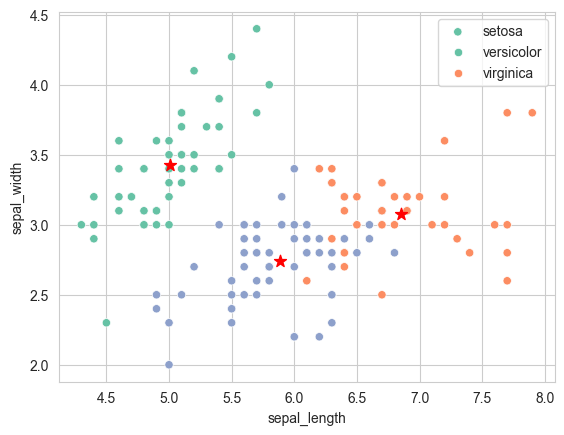

In [111]:
sns.scatterplot(x="sepal_length", y="sepal_width", 
                hue=y_model, data=X, palette="Set2")
plt.legend(["setosa", "versicolor", "virginica"])
plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1], c="red", s=80, marker="*");

### Reducción de dimensionalidad
La reducción de dimensionalidad es un tipo de aprendizaje no supervisado que se utiliza para reducir la dimensionalidad de los datos. Por ejemplo, se puede utilizar para reducir la dimensionalidad de las imágenes, reducir la dimensionalidad de los datos de audio, etc.

#### Analizar los datos e identificar el problema
En este ejemplo, queremos reducir la dimensionalidad de los datos de flores de iris. Por lo tanto, este es un problema de reducción de dimensionalidad.

#### Elegir el modelo
Para resolver el problema, utilizaremos el algoritmo de reducción de dimensionalidad de PCA. El algoritmo de reducción de dimensionalidad de PCA es un algoritmo de aprendizaje no supervisado que se utiliza para reducir la dimensionalidad de los datos. El algoritmo de reducción de dimensionalidad de PCA se puede utilizar para problemas de reducción de dimensionalidad binaria y reducción de dimensionalidad multiclase.

In [112]:
from sklearn.decomposition import PCA
model_PCA = PCA(n_components=2, random_state=69)
model_PCA

PCA(n_components=2, random_state=69)

#### Preparar los datos
En este ejemplo, utilizaremos todas las características como datos de entrada.

In [115]:
X = iris.drop("species", axis=1)
X.head()
y = iris["species"]

#### Entrenar el modelo
Para entrenar el modelo, llamamos al método fit() del objeto model. El método fit() toma un parámetro: X. X es una matriz bidimensional que contiene los datos de entrada.

In [116]:
model_PCA.fit(X)


PCA(n_components=2, random_state=69)

Debes haber notado que el método fit() no devuelve nada. En su lugar, el método fit() modifica el objeto model. Para ver cómo se modificó el objeto model, podemos imprimir el atributo components_ del objeto model.

#### Usar el modelo

In [117]:
X_2D = model_PCA.transform(X)

Para visualizar los datos reducidos, podemos usar la función scatterplot() de seaborn.

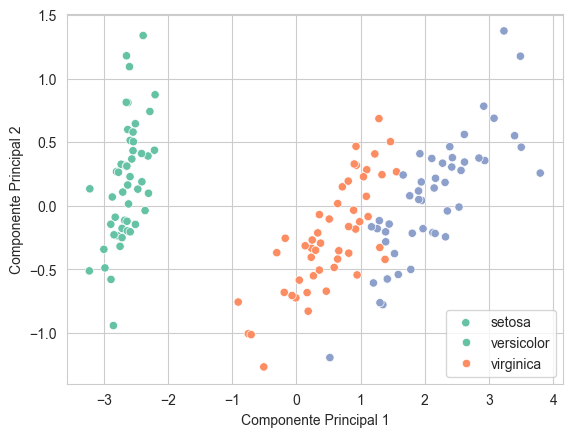

In [120]:
iris["PCA1"] = X_2D[:, 0]
iris["PCA2"] = X_2D[:, 1]
sns.scatterplot(x="PCA1", y="PCA2", hue="species", 
                data=iris, palette="Set2")
plt.legend(["setosa", "versicolor", "virginica"])
plt.xlabel("Componente Principal 1")
plt.ylabel("Componente Principal 2")
plt.show()

¿y si hacemos clustering con los datos reducidos?

In [121]:
model = KMeans(n_clusters=3, random_state=69, n_init='auto', max_iter=300)
model.fit(X_2D)
y_model = model.predict(X_2D)

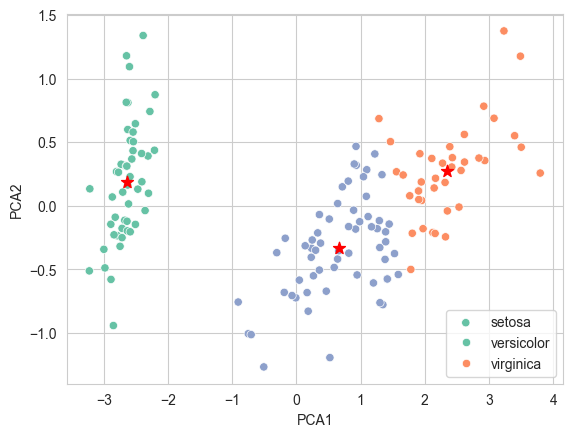

In [122]:
sns.scatterplot(x="PCA1", y="PCA2", hue=y_model, 
                data=iris, palette="Set2")
plt.legend(["setosa", "versicolor", "virginica"])
plt.scatter(model.cluster_centers_[:, 0], 
            model.cluster_centers_[:, 1], c="red", s=80, marker="*");

In [ ]:
# Nueva flor con longitud del sépalo de 5.0 cm, ancho del sépalo de 3.6 cm, longitud del pétalo de 1.3 cm y ancho del pétalo de 0.25 cm

## Aprendizaje supervisado
El aprendizaje supervisado es un tipo de aprendizaje en el que se proporcionan datos de entrenamiento etiquetados. El algoritmo de aprendizaje supervisado aprende de los datos de entrenamiento y luego se puede utilizar para hacer predicciones sobre datos no etiquetados.

### Regresión
La regresión lineal es un algoritmo de aprendizaje supervisado que se utiliza para predecir valores continuos. Por ejemplo, se puede utilizar para predecir los precios de las acciones, las temperaturas, etc. La regresión lineal se puede utilizar para problemas de regresión y clasificación, pero se utiliza principalmente para problemas de regresión.

#### Analizar los datos
En este ejemplo, utilizaremos datos sintéticos para entrenar el modelo. Los datos sintéticos son datos generados artificialmente. En la vida real, los datos se obtienen de fuentes como archivos CSV, bases de datos, etc.

Supongamos que tenemos datos de entrada y salida como se muestra a continuación:
x - Datos de entrada: corresponde con el tiempo transcurrido desde el inicio de IMPULSE-IA.
y - Datos de salida: corresponde con la satisfacción de los asistentes a IMPULSE-IA.

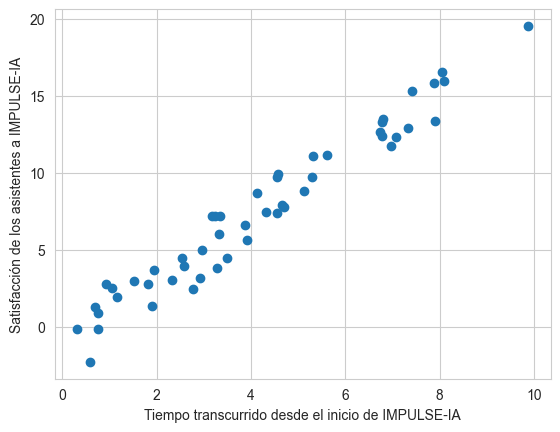

In [5]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

rng = np.random.RandomState(69)
x = 10 * rng.rand(50)
y = 2 * x - 1 + rng.randn(50)
plt.scatter(x, y)
plt.xlabel("Tiempo transcurrido desde el inicio de IMPULSE-IA")
plt.ylabel("Satisfacción de los asistentes a IMPULSE-IA")
plt.show()

#### Identificar el problema
En este ejemplo, queremos predecir la satisfacción de los asistentes a IMPULSE-IA en función del tiempo transcurrido desde el inicio de IMPULSE-IA. Por lo tanto, este es un problema de regresión.

#### Elegir el modelo
En este ejemplo, utilizaremos la regresión lineal para resolver el problema.

In [6]:
from sklearn.linear_model import LinearRegression

Ahora identificamos los hiperparámetros del modelo. Los hiperparámetros son parámetros que no se aprenden durante el entrenamiento del modelo. En este ejemplo, el hiperparámetro es fit_intercept. Este hiperparámetro indica si se debe calcular o no la intersección para el modelo. El valor predeterminado es True, lo que significa que se calculará la intersección.

In [7]:
model = LinearRegression(fit_intercept=True)
model

LinearRegression()

#### Preparar los datos
Dado que sklearn espera que los datos de entrada sean una matriz bidimensional, debemos reformatear los datos de entrada. Además, dado que sklearn espera que los datos de salida sean un vector, debemos reformatear los datos de salida.

In [8]:
X = x[:, np.newaxis]
X.shape

(50, 1)

In [9]:
X[:5]

array([[2.96249162],
       [8.09067716],
       [3.50252525],
       [7.89409256],
       [5.61348976]])

#### Entrenar el modelo
Para entrenar el modelo, llamamos al método fit() del objeto model. El método fit() toma dos parámetros: X e y. X es una matriz bidimensional que contiene los datos de entrada y y es un vector que contiene los datos de salida.

In [10]:
model.fit(X, y)

LinearRegression()

Debes haber notado que el método fit() no devuelve nada. En su lugar, el método fit() modifica el objeto model. Para ver cómo se modificó el objeto model, podemos imprimir el atributo coef_ del objeto model.

El guión bajo en coef_ indica, por convención, que el atributo coef_ es un atributo aprendido durante el entrenamiento del modelo.

In [11]:
# Pendiente
model.coef_

array([2.04308746])

In [12]:
# Intersección
model.intercept_

-1.0351718753217583

Si queremos ver la expresión matemática del modelo, podemos imprimir el atributo coef_ y el atributo intercept_ del objeto model.

In [13]:
print("y = {:.2f}x + {:.2f}".format(model.coef_[0], model.intercept_))

y = 2.04x + -1.04


#### Evaluación del modelo
Para evaluar el modelo, llamamos al método score() del objeto model. El método score() toma dos parámetros: X e y. X es una matriz bidimensional que contiene los datos de entrada y y es un vector que contiene los datos de salida.

**Coeficiente de determinación (R²)**
El coeficiente de determinación (R²) es una medida de cuán cerca están los datos de la línea de regresión. El valor de R² varía entre 0 y 1, donde 0 indica que los datos no se ajustan a la línea de regresión y 1 indica que los datos se ajustan perfectamente a la línea de regresión.

In [17]:
sklearn_score = model.score(X, y)
print("sklearn_score:", sklearn_score)

sklearn_score: 0.9499973273737448


**Coeficiente de determinación ajustado (R² ajustado)**
El coeficiente de determinación ajustado (R² ajustado) es una medida de cuán cerca están los datos de la línea de regresión, pero tiene en cuenta el número de características en el modelo. El valor de R² ajustado varía entre 0 y 1, donde 0 indica que los datos no se ajustan a la línea de regresión y 1 indica que los datos se ajustan perfectamente a la línea de regresión.

In [18]:
from sklearn.metrics import r2_score
print("r2_score:", r2_score(y, model.predict(X)))

r2_score: 0.9499973273737448


**Error cuadrático medio (MSE)**
El error cuadrático medio (MSE) es una medida de la diferencia entre los valores predichos y los valores reales. El valor de MSE varía entre 0 y ∞, donde 0 indica que no hay error y ∞ indica que el modelo no es capaz de predecir correctamente los valores reales.

In [19]:
from sklearn.metrics import mean_squared_error
print("mean_squared_error:", mean_squared_error(y, model.predict(X)))


mean_squared_error: 1.2927341602740485


**Error absoluto medio (MAE)**
El error absoluto medio (MAE) es una medida de la diferencia entre los valores predichos y los valores reales. El valor de MAE varía entre 0 y ∞, donde 0 indica que no hay error y ∞ indica que el modelo no es capaz de predecir correctamente los valores reales.

In [20]:
from sklearn.metrics import mean_absolute_error
print("mean_absolute_error:", mean_absolute_error(y, model.predict(X)))


mean_absolute_error: 0.9574126953793451


**Error absoluto mediano (MedAE)**
El error absoluto mediano (MedAE) es una medida de la diferencia entre los valores predichos y los valores reales. El valor de MedAE varía entre 0 y ∞, donde 0 indica que no hay error y ∞ indica que el modelo no es capaz de predecir correctamente los valores reales.

In [21]:
from sklearn.metrics import median_absolute_error
print("median_absolute_error:", median_absolute_error(y, model.predict(X)))

median_absolute_error: 0.8284887324744243


**Estimación de varianza explicada (EVS)**
La estimación de varianza explicada (EVS) es una medida de la diferencia entre los valores predichos y los valores reales. El valor de EVS varía entre 0 y 1, donde 0 indica que el modelo no es capaz de predecir correctamente los valores reales y 1 indica que el modelo es capaz de predecir correctamente los valores reales.

In [23]:
from sklearn.metrics import explained_variance_score
print("explained_variance_score:", explained_variance_score(y, model.predict(X)))

explained_variance_score: 0.9499973273737446


#### Usar el modelo
Para usar el modelo, llamamos al método predict() del objeto model. El método predict() toma un parámetro: X. X es una matriz bidimensional que contiene los datos de entrada.

In [26]:
# Datos de entrada sintéticos
x_test = np.linspace(0, 11)
X_test = x_test[:, np.newaxis]

# Datos de salida predichos
y_test = model.predict(X_test)

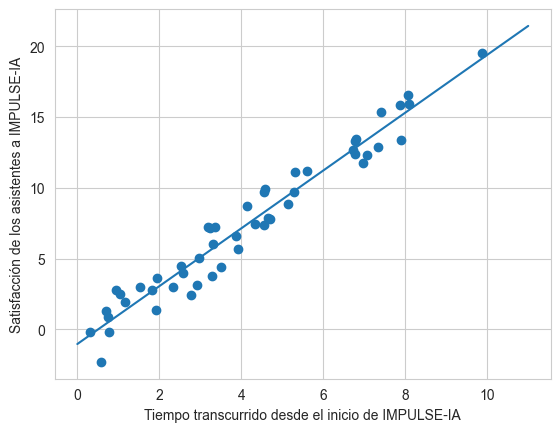

In [28]:
plt.scatter(x, y)
plt.plot(x_test, y_test)
plt.xlabel("Tiempo transcurrido desde el inicio de IMPULSE-IA")
plt.ylabel("Satisfacción de los asistentes a IMPULSE-IA")
plt.show()

### Clasificación
La clasificación es un tipo de aprendizaje supervisado que se utiliza para predecir valores discretos. Por ejemplo, se puede utilizar para predecir si un correo electrónico es spam o no, si una imagen es de un perro o un gato, etc. La clasificación se puede utilizar para problemas de clasificación binaria y clasificación multiclase.

En este ejemplo, utilizaremos los datos de flores de iris para entrenar el modelo. Los datos de flores de iris contienen 150 muestras de flores de iris de tres especies diferentes: setosa, versicolor y virginica. Para cada muestra, se midieron cuatro características: longitud del sépalo, ancho del sépalo, longitud del pétalo y ancho del pétalo. El objetivo es predecir la especie de flor de iris dada las cuatro características.

In [29]:
import seaborn as sns

iris = sns.load_dataset("iris")
iris.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [32]:
# Veamos los tipos de datos de las columnas
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


#### Analizar los datos e identificar el problema
En este ejemplo, queremos predecir la especie de flor de iris dada las cuatro características. Por lo tanto, este es un problema de clasificación multiclase.

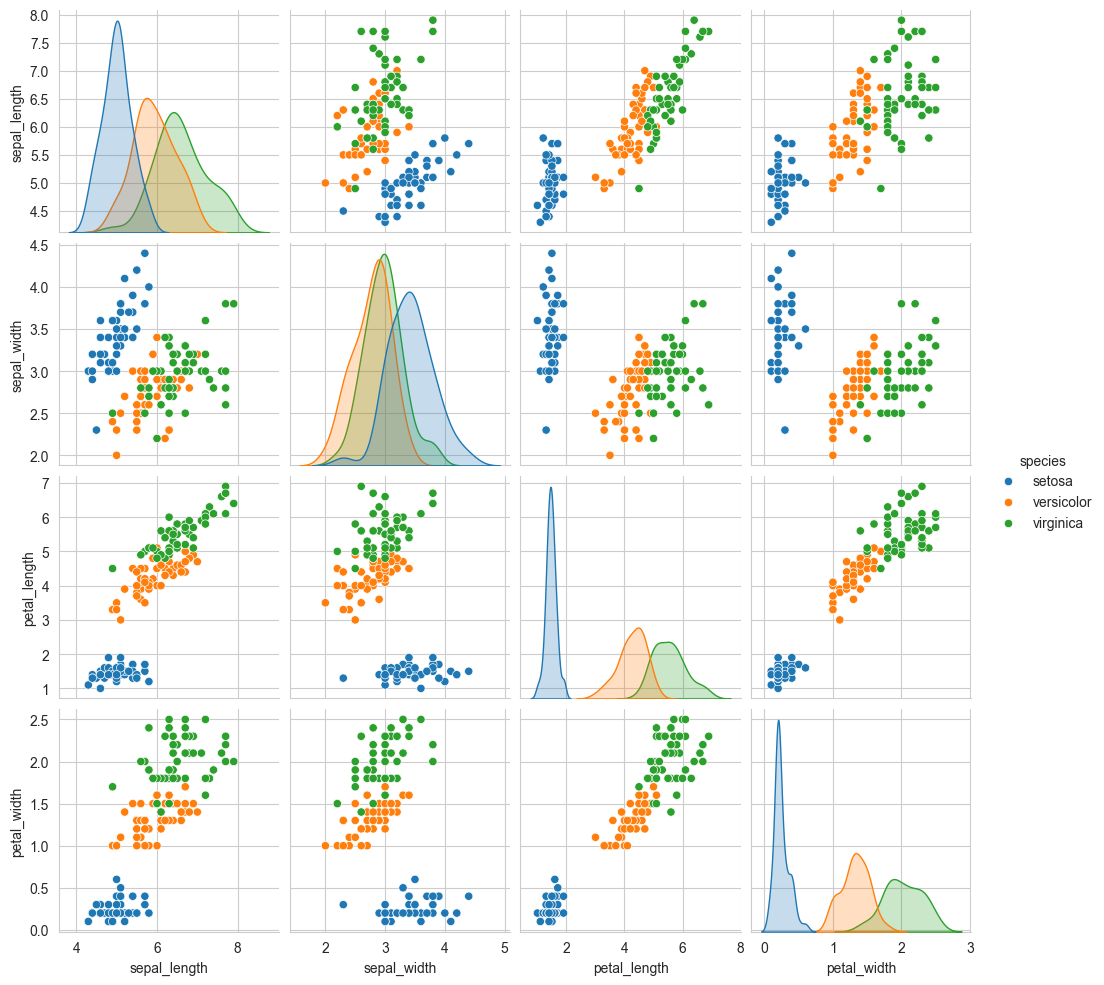

In [34]:
sns.pairplot(iris, hue="species");

#### Elegir el modelo
En este ejemplo, utilizaremos el algoritmo de clasificación de Naive Bayes para resolver el problema. El algoritmo de clasificación de Naive Bayes es un algoritmo de aprendizaje supervisado que se utiliza para resolver problemas de clasificación. El algoritmo de clasificación de Naive Bayes se puede utilizar para problemas de clasificación binaria y clasificación multiclase.

In [36]:
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model

GaussianNB()

#### Preparar los datos
En este ejemplo, utilizaremos todas las características como datos de entrada y la especie de flor de iris como datos de salida.

In [37]:
X = iris.drop("species", axis=1)
X.head()

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [38]:
y = iris["species"]
y.head()

0    setosa
1    setosa
2    setosa
3    setosa
4    setosa
Name: species, dtype: object

Ahora dividimos los datos en datos de entrenamiento y datos de prueba. Los datos de entrenamiento se utilizan para entrenar el modelo y los datos de prueba se utilizan para evaluar el modelo.

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=69)

In [40]:
print("X_train.shape:", X_train.shape)
print("y_train.shape:", y_train.shape)
print("X_test.shape:", X_test.shape)
print("y_test.shape:", y_test.shape)

X_train.shape: (112, 4)
y_train.shape: (112,)
X_test.shape: (38, 4)
y_test.shape: (38,)


#### Entrenar el modelo
Para entrenar el modelo, llamamos al método fit() del objeto model. El método fit() toma dos parámetros: X e y. X es una matriz bidimensional que contiene los datos de entrada y y es un vector que contiene los datos de salida.

In [41]:
model.fit(X_train, y_train)

GaussianNB()

Debes haber notado que el método fit() no devuelve nada. En su lugar, el método fit() modifica el objeto model. Para ver cómo se modificó el objeto model, podemos imprimir el atributo theta_ del objeto model.

In [42]:
print("theta_:", model.theta_)

theta_: [[5.00277778 3.41111111 1.47777778 0.25833333]
 [5.96829268 2.75365854 4.25853659 1.33658537]
 [6.55714286 2.98       5.49142857 1.99142857]]


Estos son los valores medios de las características de cada clase.

#### Evaluación del modelo
Para evaluar el modelo, llamamos al método score() del objeto model. El método score() toma dos parámetros: X e y. X es una matriz bidimensional que contiene los datos de entrada y y es un vector que contiene los datos de salida.

In [43]:
y_model = model.predict(X_test)

In [44]:
from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(y_test, y_model))

accuracy_score: 0.9736842105263158


Para ver la matriz de confusión, podemos usar la función confusion_matrix() de sklearn.metrics.

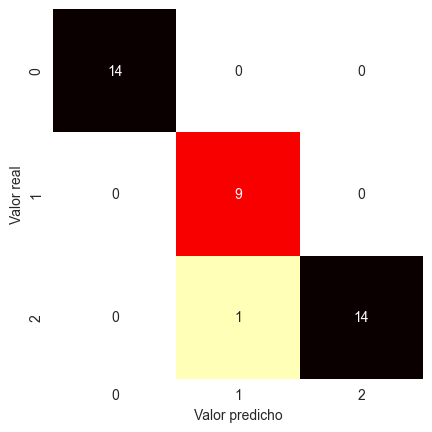

In [52]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="hot_r")
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.show()

Ten en cuenta que los valores de las clases son:
* 0 - setosa
* 1 - versicolor
* 2 - virginica

También podemos imprimir el informe de clasificación usando la función classification_report() de sklearn.metrics.

In [54]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_model, target_names=["setosa", "versicolor", "virginica"]))

              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        14
  versicolor       0.90      1.00      0.95         9
   virginica       1.00      0.93      0.97        15

    accuracy                           0.97        38
   macro avg       0.97      0.98      0.97        38
weighted avg       0.98      0.97      0.97        38


#### Usar el modelo
Para usar el modelo, llamamos al método predict() del objeto model. El método predict() toma un parámetro: X. X es una matriz bidimensional que contiene los datos de entrada.

In [68]:
# Nueva flor con longitud del sépalo de 5.0 cm, ancho del sépalo de 3.6 cm, longitud del pétalo de 1.3 cm y ancho del pétalo de 0.25 cm
nueva_flor = pd.DataFrame([[5.0, 3.6, 1.3, 0.25]], 
                          columns=X_test.columns)
nueva_flor

,sepal_length,sepal_width,petal_length,petal_width
0,5.0,3.6,1.3,0.25


In [67]:
model.predict(nueva_flor)

array(['setosa'], dtype='<U10')

### Redes neuronales
Las redes neuronales son un tipo de aprendizaje supervisado que se utiliza para predecir valores discretos. Por ejemplo, se puede utilizar para predecir si un correo electrónico es spam o no, si una imagen es de un perro o un gato, etc. Las redes neuronales se pueden utilizar para problemas de clasificación binaria y clasificación multiclase. Incluso se pueden utilizar para problemas de regresión.

#### Clasificación

In [123]:
from sklearn.datasets import load_iris
iris = load_iris()

In [124]:
X = iris.data
y = iris.target

In [174]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [217]:
from sklearn.neural_network import MLPClassifier
model = MLPClassifier(
    hidden_layer_sizes=(10),
    activation="tanh",
    warm_start=True,
    solver="adam",
    random_state=42,
    max_iter=1000)


In [218]:
model.fit(X_train, y_train)

/Users/jcrvz/.pyenv/versions/miniforge3-22.9.0-0/lib/python3.8/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (1000) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPClassifier(activation='tanh', hidden_layer_sizes=10, max_iter=1000,
              random_state=42, warm_start=True)

Una vez que el modelo está entrenado, podemos usarlo para hacer predicciones.

In [219]:
y_model = model.predict(X_test)


In [220]:
from sklearn.metrics import accuracy_score
print("accuracy_score:", accuracy_score(y_test, y_model))


accuracy_score: 0.9666666666666667


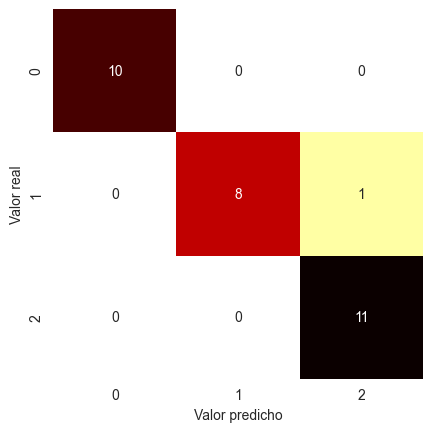

In [221]:
from sklearn.metrics import confusion_matrix
mat = confusion_matrix(y_test, y_model)
sns.heatmap(mat, square=True, annot=True, cbar=False, cmap="hot_r")
plt.xlabel("Valor predicho")
plt.ylabel("Valor real")
plt.show()

In [222]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_model, target_names=["setosa", "versicolor", "virginica"]))


              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      0.89      0.94         9
   virginica       0.92      1.00      0.96        11

    accuracy                           0.97        30
   macro avg       0.97      0.96      0.97        30
weighted avg       0.97      0.97      0.97        30


Veamos las curvas de aprendizaje y validación

In [223]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="accuracy", n_jobs=-1)


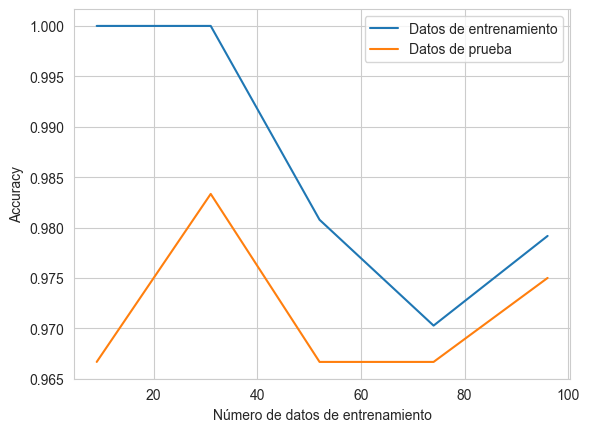

In [224]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Datos de entrenamiento")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Datos de prueba")
plt.xlabel("Número de datos de entrenamiento")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

Veamos las curvas de aprendizaje y validación

In [225]:
from sklearn.model_selection import validation_curve
param_range = np.arange(1, 100, 2)
train_scores, test_scores = validation_curve(
    model, X_train, y_train, param_name="max_iter", param_range=param_range, cv=5, scoring="accuracy", n_jobs=-1)


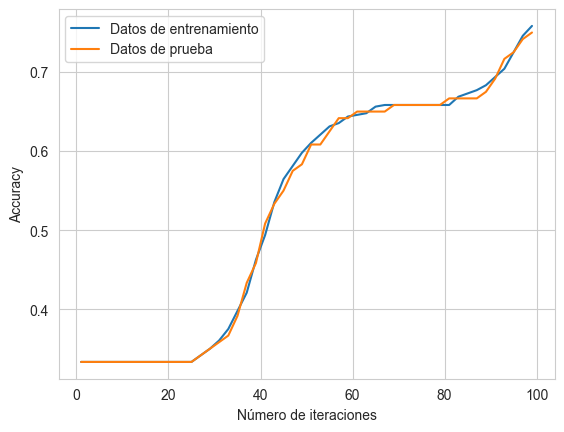

In [226]:
plt.plot(param_range, np.mean(train_scores, axis=1), label="Datos de entrenamiento")
plt.plot(param_range, np.mean(test_scores, axis=1), label="Datos de prueba")
plt.xlabel("Número de iteraciones")
plt.ylabel("Accuracy")
plt.legend()
plt.show()

#### Regresión

Ahora veamos un ejemplo de regresión. En este ejemplo, utilizaremos los datos de diabetes para entrenar el modelo. Los datos de diabetes contienen 442 muestras de pacientes con diabetes. Para cada muestra, se midieron diez características: edad, sexo, índice de masa corporal, presión arterial promedio, etc. El objetivo es predecir la progresión de la enfermedad un año después de la línea de base.

In [379]:
import pandas as pd
# Los datos de diabetes están disponibles en https://www4.stat.ncsu.edu/~boos/var.select/diabetes.html o en https://www.kaggle.com/datasets/saurabh00007/diabetescsv?resource=download&select=diabetes.csv
data = pd.read_csv("diabetes.csv")
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


#### Analizar los datos e identificar el problema
En este ejemplo, queremos predecir la progresión de la enfermedad un año después de la línea de base. Por lo tanto, este es un problema de regresión.

In [365]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [366]:
data.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

Elegimos el modelo

In [346]:
from sklearn.neural_network import MLPRegressor
model = MLPRegressor(
    hidden_layer_sizes=(64, 32, 16),
    solver="adam",
    activation="relu",
    max_iter=10000)


Preparamos los datos

In [367]:
X = data.drop(["Outcome"], axis=1).copy().to_numpy()
y = data.Outcome.to_numpy()


Escalar los datos

In [368]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [380]:
X

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [369]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=69)


Entrenamos el modelo

In [370]:
model.fit(X_train, y_train)


MLPRegressor(hidden_layer_sizes=(64, 32, 16), max_iter=10000)

Una vez que el modelo está entrenado, podemos usarlo para hacer predicciones.

In [371]:
y_model = model.predict(X_test)


Evaluamos el modelo

In [372]:
from sklearn.metrics import r2_score
print("r2_score:", r2_score(y_test, y_model))

r2_score: 0.027444910796484367


In [373]:
from sklearn.metrics import mean_squared_error
print("mean_squared_error:", mean_squared_error(y_test, y_model))


mean_squared_error: 0.22329070925590913


Veamos la curva de loss

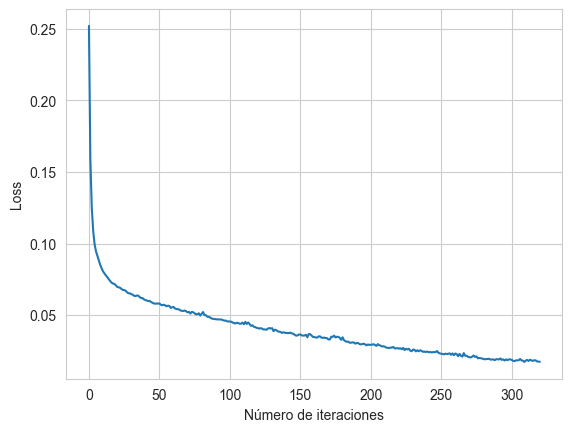

In [374]:
plt.plot(model.loss_curve_)
plt.xlabel("Número de iteraciones")
plt.ylabel("Loss")
plt.show()

Veamos las curvas de aprendizaje y validación

In [377]:
from sklearn.model_selection import learning_curve
train_sizes, train_scores, test_scores = learning_curve(
    model, X_train, y_train, cv=5, scoring="r2", n_jobs=-1)


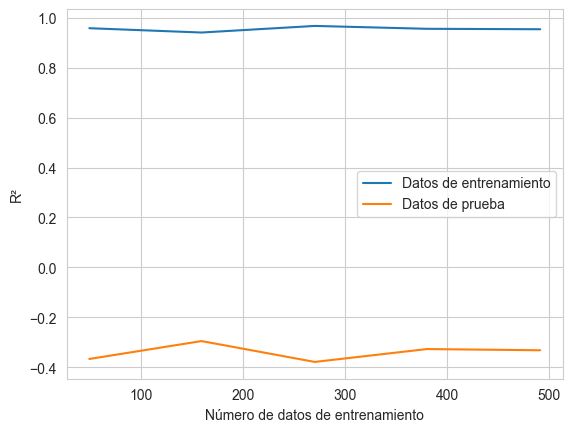

In [378]:
plt.plot(train_sizes, np.mean(train_scores, axis=1), label="Datos de entrenamiento")
plt.plot(train_sizes, np.mean(test_scores, axis=1), label="Datos de prueba")
plt.xlabel("Número de datos de entrenamiento")
plt.ylabel("R²")
plt.legend()
plt.show()